# ¡Hola María! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

María, tu trabajo se destaca por la claridad y profundidad con la que abordaste el análisis de los datos, desde la exploración inicial hasta la aplicación de técnicas como el análisis de Pareto y las pruebas estadísticas. 

Has logrado no solo procesar los datos correctamente, sino también generar conclusiones útiles que conectan muy bien con el contexto del servicio de taxis. 

Como sugerencia para fortalecer aún más tu análisis estadístico, sería conveniente incorporar la prueba de Levene antes de realizar comparaciones de medias, ya que esto asegurará que tus resultados sean más robustos y confiables. 

Vas por muy buen camino, y con este tipo de ajustes técnicos seguirás mejorando la calidad de tus análisis.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

**INICIALIZACIÓN**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


**CARGA DE DATOS**

In [2]:
file_company_trips_df = '/datasets/project_sql_result_01.csv'
company_trips_df = pd.read_csv(file_company_trips_df)

In [3]:
file_places_trips_df = '/datasets/project_sql_result_04.csv'
places_trips_df = pd.read_csv(file_places_trips_df)

**PREPARAR DATOS**

Realizaremos una exploración de cada DataFrame, utilizando eL método **(.info)** de esta manera tendremos a primera vista, como están las columnas de cada tabla, si hay valores ausentes, la calidad de la escritura de los nombres de las columnas, y así mismo, podremos ir comparando entre tablas, y determinar si tienen columnas en común para futuras concatenaciones. Con este método podremos ver con que tipos de datos cuentan las tablas. Posteriormente haremos una visualización de los datos, usando el método **(.sample)** para mostrar aleatoriamente campos a lo largo de las tablas, utilizando una muestra de 5 filas. Utilizando el método **.duplicated)** mostramos si hay duplicados explicitos, para corregirlos. En caso de requerir, se corregirá datos que cuenten con escritura no adecuada, se reemplazará valores ausentes y se corregirá nombre de las columnas para los siguientes análisis.

In [4]:
company_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
places_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
company_trips_df.sample(5)

,company_name,trips_amount
45,3011 - 66308 JBL Cab Inc.,25
43,2809 - 95474 C & D Cab Co Inc.,29
34,Norshore Cab,127
9,Blue Ribbon Taxi Association Inc.,5953
36,3591 - 63480 Chuks Cab,37


In [7]:
places_trips_df.sample(5)

,dropoff_location_name,average_trips
64,Oakland,16.633333
11,East Village,1212.066667
12,"Little Italy, UIC",863.700000
52,Little Village,33.800000
60,New City,22.933333


In [8]:
company_trips_df.duplicated().sum()

0

In [9]:
places_trips_df.duplicated().sum()

0

Contamos con 2 Datasets, en los que aplicando los métodos **(.info,.sample y .duplicated)** obtenemos la siguiente información: en el uno tenemos las empresas de taxi, donde contamos con campos **company_name**, que es un object y **trips_amount** que es un entero, no posemos valores nulos, ni datos duplicados. Así mismo el segundo Dataset contamos con los nombres de los lugares que finalizaron sus viajes, no tenemos valores nulos, ni duplicados, contamos con los campos **dropoff_location_name** que es un object y **average_trips** que es un número flotante. Los campos con los que contamos tienen el tipo correcto para los posteriores análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy bien! El análisis preliminar de los dos datasets está muy claro y bien estructurado. Usaste correctamente los métodos `.info()`, `.sample()` y `.duplicated()` para entender la estructura, calidad y limpieza de los datos. Además, tu interpretación final resume de forma precisa que los campos no tienen valores nulos ni duplicados, y que los tipos de datos son apropiados.

</div>

**IDENTIFICACION DE LOS 10 PRINCIPALES BARRIOS**

In [10]:
places_trips_df = places_trips_df.set_index('dropoff_location_name')
places_trips_df['average_trips'].sort_values(ascending=False).head(10)

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64

In [11]:
places_trips_df['peso_trips'] = places_trips_df['average_trips']/places_trips_df['average_trips'].sum()*100
top_10_places = places_trips_df.head(10)
top_10_places

,average_trips,peso_trips
dropoff_location_name,,
Loop,10727.466667,19.021798
River North,9523.666667,16.887236
Streeterville,6664.666667,11.817696
West Loop,5163.666667,9.156143
O'Hare,2546.900000,4.516128
Lake View,2420.966667,4.292825
Grant Park,2068.533333,3.667895
Museum Campus,1510.000000,2.677511
Gold Coast,1364.233333,2.419040


Determinamos que el índice debería ser los nombres de los lugares donde se finalizó los viajes, por lo que con el método **(.set_index)** lo realizamos primero, para posteriormente, con el método **(.sort_values)** poder sacar un ranking utilizando el parámetro **ascending=False**, desde los valores más altos a los bajos, y con el método **(.head)** obtuvimos un ranking de los 10 principales. Tenemos que al barrio que más viajes en promedio tiene es **Loop** con 1027.47 viajes, que representa el 19% de todos los barrios.

**ANÁLISIS CON GRÁFICAS**

In [12]:
company_trips_df['peso_trips'] = company_trips_df['trips_amount']/company_trips_df['trips_amount'].sum()*100
company_trips_df['acumulado_peso_trips'] = company_trips_df['peso_trips'].cumsum()
company_trips_df['acumulado_peso_trips'].sort_values(ascending=False)
pareto_company = company_trips_df.head(12)
pareto_company

,company_name,trips_amount,peso_trips,acumulado_peso_trips
0,Flash Cab,19558,14.243578,14.243578
1,Taxi Affiliation Services,11422,8.318343,22.561921
2,Medallion Leasing,10367,7.550014,30.111936
3,Yellow Cab,9888,7.201171,37.313107
4,Taxi Affiliation Service Yellow,9299,6.772218,44.085325
5,Chicago Carriage Cab Corp,9181,6.686282,50.771606
6,City Service,8448,6.152457,56.924063
7,Sun Taxi,7701,5.608436,62.532499
8,Star North Management LLC,7455,5.429281,67.961780
9,Blue Ribbon Taxi Association Inc.,5953,4.335414,72.297194


Realizaremos 2 gráficos de barras horizontales. El primero para mostrar el número de viajes por empresa de Taxis, para lo que primero realizamos un análisis de Pareto, para poder graficar las empresas que tienen el 80% de participación en números de viajes, para esto aumentamos 2 columnas en el dataframe, tanto el peso, como el peso acumulado, así definimos que solo en 12 empresas se encuentra el 80%, de este Pareto realizaremos una gráfica de barras horizontales que muestra de mejor manera el comportamiento, utilizando el método **(.plot)**. De la misma manera, para  mostrar el Top10 de barrios principales, a diferencia del anterior, en este gráfico, para el eje 'y' utilizamos el índice, por lo que se tuvo que utilizar el método **(.index)** en el eje y.

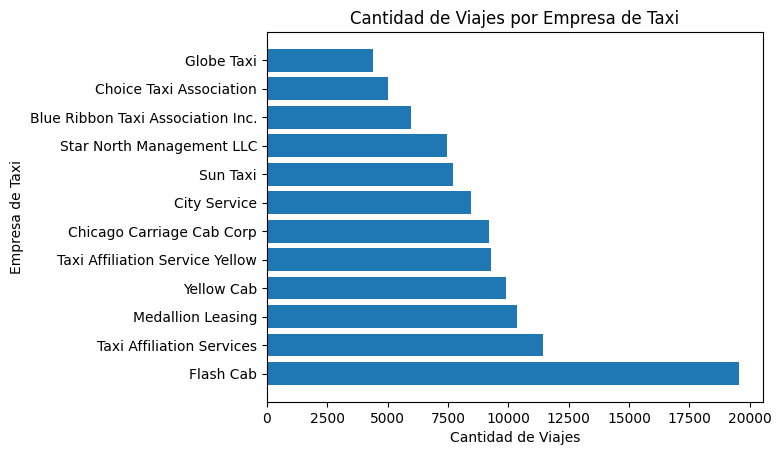

In [13]:
plt.barh(pareto_company['company_name'], pareto_company['trips_amount'])
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Empresa de Taxi')
plt.title('Cantidad de Viajes por Empresa de Taxi')
plt.show()

El gráfico visualiza el rendimiento de cada empresa de taxi en términos de la cantidad de viajes, destacando la concetración en pocos en el mercado y la distribución general de la actividad.
**Flash Cab** es la empresa de taxis dominante por un margen significativo, con un 14% de participación, superando con gran diferencia a las demás empresas. A medida que se desciende en la lista, la cantidad de viajes por empresa disminuye de manera significativa. Las empresas como **Globe Taxi y Choice Taxi Association**, tienen una cantidad de viajes considerablemente menor , lo que podría indicar una menor demanda.
Este tipo de distribución es un patrón clásico que se presta a un análisis de Pareto (la regla 80/20). Un pequeño porcentaje de empresas son responsables de la mayor parte de los viajes.

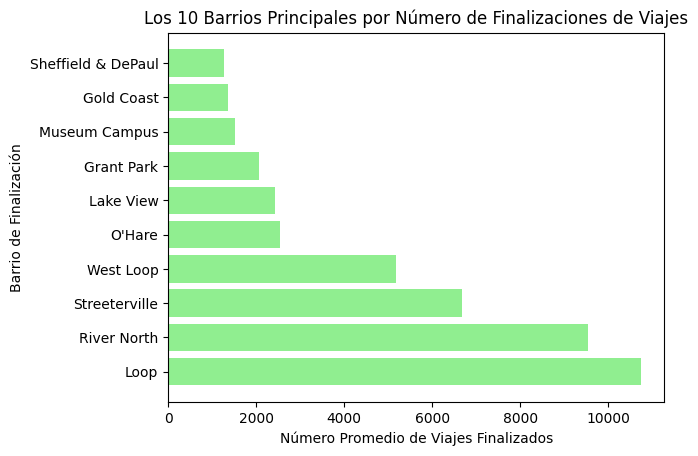

In [14]:
plt.barh(y=top_10_places.index, width=top_10_places['average_trips'], color='lightgreen')
plt.xlabel('Número Promedio de Viajes Finalizados')
plt.ylabel('Barrio de Finalización')
plt.title('Los 10 Barrios Principales por Número de Finalizaciones de Viajes')
plt.show()

El barrio **Loop** lidera el mayor número de finalizaciones de viajes con un 19% de participoción.
El gráfico permite identificar claramente las áreas de mayor demanda de taxis como destino final, información útil para una empresa de taxis, esta información ayuda mucho a la asignación de recursos, la planificación de rutas y la optimización de la disponibilidad de taxis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

María tu trabajo muestra un manejo muy sólido de herramientas de análisis para extraer conclusiones relevantes del comportamiento del servicio de taxis. La implementación del análisis de Pareto es un acierto, ya que permite visualizar de forma clara la concentración de la demanda en pocas empresas, y logras comunicar bien la implicación de estos resultados en términos de participación de mercado. Además, reconoces con claridad la importancia del barrio Loop como nodo clave en la red de viajes, lo que refuerza la utilidad práctica de tus hallazgos.

</div>

**PRUEBA DE HIPOTESIS**

In [15]:
file_airport_trips_df = '/datasets/project_sql_result_07.csv'
airport_trips_df = pd.read_csv(file_airport_trips_df)

In [16]:
airport_trips_df.sample(5)

,start_ts,weather_conditions,duration_seconds
520,2017-11-04 10:00:00,Good,2697.0
973,2017-11-04 19:00:00,Good,1748.0
60,2017-11-11 08:00:00,Good,1320.0
353,2017-11-25 18:00:00,Good,4140.0
518,2017-11-04 17:00:00,Bad,2580.0


In [17]:
airport_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
airport_trips_df['start_ts'] = pd.to_datetime(airport_trips_df['start_ts'], format='%Y-%m-%d %H:%M:%S')

Se realiza la carga de un nuevo Dataset, en el que analizamos con los metodos **(.info,.sample)** como se encuentra la información , podemos ver que contamos con un campo con un tipo erroneo, como es **star_ts** que es un campo de fecha, por lo que debemos transformarlo con el método **(.to_datetime)**, así mismo podemos ver que no contamos con campos nulos.

In [19]:
airport_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [20]:
airport_trips_df['day_of_week'] = airport_trips_df['start_ts'].dt.day_name()
airport_trips_df

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


Con el método **(.dt.day_name)** obtuvimos a día de la semana corresponde la información, y vemos que la tabla es del día sábado.

In [21]:
bad_saturday = airport_trips_df[airport_trips_df['weather_conditions'] == 'Bad']['duration_seconds']
good_saturday = airport_trips_df[airport_trips_df['weather_conditions'] == 'Good']['duration_seconds']
resultado_prueba_t = st.ttest_ind(bad_saturday, good_saturday)
pvalue = resultado_prueba_t.pvalue
alpha = 0.05
print(f"Valor p: {pvalue}")

if pvalue > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis nula.")

Valor p: 6.517970327099473e-12
Hay suficiente evidencia para rechazar la hipótesis nula.


Determinmos el valor **alfa de 0.05** para el análisis. Se puede concluir que hay una diferencia significativa en la duración promedio de los viajes al aeropuerto los sábados cuando las condiciones climáticas son "Malas" en comparación con cuando son "Buenas". Esto sugiere que las condiciones climáticas **sí tienen un impacto en la duración de estos viajes.**

La hipótesis nula es que los sábados, si cambia la duración de los viajes cuando el clima,  esta "Malo", y la hipótesis alternativa es que no cambia la duración de los viajes si el clima está "Malo". Se utilizó el criterio de igualdad de la media con poblaciones independientes **st.ttest_ind**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

María aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula, logrando comprobar que el clima sí afecta la duración de los viajes en Taxi

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la *prueba t* sea estadísticamente válida.

</div>
</div>

**CONCLUSIONES**

Utilizar los métodos adecuados como **(.info y .sample)** nos permite tener la visión de como esta la data y con información contamos. El poder aumentar columnas con cálculos propios, nos permiten realizat más análisis como el de **Pareto**, que es idela para no mostrar gráficas que no se puedan leer, así tambien poder crearnos listados que muetran los **TOP** con los método **(.sort_values)**, las **gráficas** son importantes para la visualización de las personas no técnicas y que en este mundo donde el tiempo es oro, se pueda a primera vista conocer como estan sus negocios o como están dando resultados diferentes estratégias, todo este conjunto de herramientas, nos ayudan a determinar nuestros anáslisis, en este coso conocer información relevante para la toma de decisiones, como lo barrios con mayor demanda o que empresas tienen la cocentración de viajes y sin duda al **formular una hipótesis** y su resultado, nos permite ver como, datos como el clima, muestra su impacto en los números.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has logrado integrar adecuadamente distintas técnicas de exploración y análisis de datos para generar conclusiones que aportan valor práctico.

</div>